<a href="https://colab.research.google.com/github/kapibara3chi/ReinforcementLearning/blob/main/ReinfoecementLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# simple Sample

## pip

In [9]:
!pip install gym-anytrading
!pip install yfinance

## code

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[*********************100%%**********************]  1 of 1 completed


              Open    High     Low   Close    Adj Close   Volume
Date                                                            
2018-01-01  1423.0  1423.0  1423.0  1423.0  1361.207642        0
2018-01-02  1423.0  1423.0  1423.0  1423.0  1361.207642        0
2018-01-03  1423.0  1423.0  1423.0  1423.0  1361.207642        0
2018-01-04  1482.5  1622.5  1479.0  1610.0  1540.087280  3264200
2018-01-05  1627.5  1725.0  1620.0  1725.0  1650.093628  2724600
Info: {'total_reward': 24056.5, 'total_profit': 0.024819144795444656, 'position': <Positions.Long: 1>}
trades:[{'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Long: 1>}, {'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Long: 1>}, {'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Long: 1>}, {'total_reward': 217.5, 'total_profit': 1.1027688873626376, 'position': <Positions.Short: 0>}, {'total_reward': 217.5, 'total_profit': 1.1027688873626376, 'position': <Positions.Short: 0>}, {'total_rewar

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.render_all to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_all` for environment variables or `env.get_wrapper_attr('render_all')` that will search the reminding wrappers.
  logger.warn(


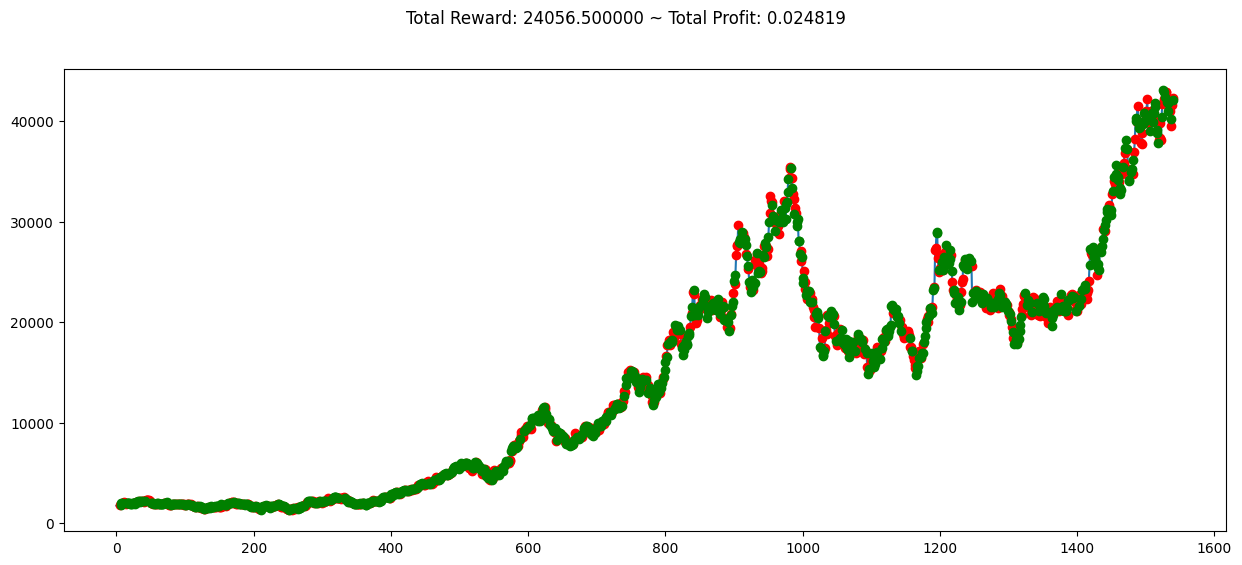

In [28]:
import gym
import gym_anytrading
import gymnasium as gym
from gym_anytrading.envs import StocksEnv

import matplotlib.pyplot as plt
from gym_anytrading.envs import StocksEnv

class CustomStocksEnv(StocksEnv):
    def render_all(self):
        # プロットのサイズを設定
        plt.figure(figsize=(15, 6))

        # 親クラスのrender_allメソッドを呼び出し
        super().render_all()

        # 凡例を追加
        plt.legend(['Price', 'Buy', 'Sell'])

        # マーカーのサイズを小さくする
        plt.setp(plt.gca().get_lines(), markersize=1)


# 他にもデータ処理や可視化のために必要なライブラリをインポートします
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf
from datetime import datetime

# CSVファイルから株価データを読み込みます
df = yf.download("6920.T",start='2018-01-01',end = datetime.now(),interval="1d")
print(df.head())

# `gym-anytrading`に必要なカラム名に変更します
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# Forex環境を構築しますが、株価予測にも同様に適用できます
env = gym.make('stocks-v0', df=df, frame_bound=(10, len(df)), window_size=5)


state = env.reset()

# 取引情報を格納するリストを初期化
trades = []

while True:
    action = env.action_space.sample()  # ランダムな行動を選択
    next_state, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        print("Info:", info)
        break
    if 'total_reward' in info:
      trades.append(info)

print(f"trades:{trades}")
plt.figure(figsize=(15, 6))
plt.cla()
env.render_all()
plt.show()

